# **Bored Ape Yacht Club Market Analysis**

Please follow the below link to view the research summary for this project.

https://docs.google.com/document/d/1TsRFfeXjo4k0m577LaWjR6aWvYf3TtzV/edit?usp=sharing&ouid=100777338838366976364&rtpof=true&sd=true

The primary dataset for this analysis will be the Bored Ape Yacht Club NFT tokens. The 10,00-piece collection will be broken down into individual tokens, and those tokens analyzed for their individual traits.

The second dataset will be the sales history of the Bored Ape Yacht Club tokens. The total sales history of each token will be included in the dataset, however only the top sales price of each token will be used for the purposes of proving or disproving the hypothesis. 

---



To begin, run each cell in order. The below cells will produce errors as they are used only to demonstrate the code used for gathering the data.

In [ ]:
from dataclasses import replace
from bs4.element import AttributeValueWithCharsetSubstitution
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from google.colab import files 
import io

In [ ]:
# Values in range(0,10) are set to demonstrate functionality. 
# Setting range to range(0,10000) will scrape the entire ape.offbase website for the data.
# To collect the full dataset will take roughly 1 hour and 30 minutes and is not advised due to the type of collection.
--------------------------------------------------------------------------------------
#URL = 'https://ape.offbase.org/token/'

#results = {}
#for page in range(0,10):

    #req = requests.get(URL + str(page) + '/')
    #value = pd.read_html(URL + str(page) + '/')[0]
    
    #results[page] = value

SyntaxError: ignored

In [ ]:
# Same technique used seperately to get data from BAYC market history.
# Website has since changed its format - shown only as a demonstration.
--------------------------------------------------------------------------
# URL = 'https://nonfungible.com/market/history/boredapeclub/'

# results = {}
# for page in range(0,179):

  #  req = requests.get(URL + str(page) + '/')
  # value = pd.read_html(URL + str(page) + '/')[0]
    
  # results[page] = value

SyntaxError: ignored

Data was exported as .txt and cleaned in excel. Uploaded Below.


---



The first step in the analysis process will be defining trait rarity within the total collection. 

This will be done by calculating each individual trait compared to its appearance within the total population.

Once trait rarity is defined, it will be possible to calculate the derived rarity of the individual token. 

As each token possesses between four and seven traits, the quantity of traits a token has will be considered in the rarity calculation. 

With each token defined based on its rarity within the total collection, we can compare the sales prices of each token based on its rarity score.

The results of the analysis will show either a correlation between price and rarity of the tokens thus proving the hypothesis or show no correlation between price and rarity of the tokens thus disproving the hypothesis. 

# **Null Hypothesis: A BAYC Tokens Price is Based on the Rarity of its Combined Traits**

# Data source URLs:
https://docs.google.com/spreadsheets/d/1_HByiLGZzrwSxSgXoKCOx7qbBeDihmZe/edit?usp=sharing&ouid=100777338838366976364&rtpof=true&sd=true

https://docs.google.com/spreadsheets/d/13fRxroxL6xT5m86pxaehsfmz-5qP5zqM/edit?usp=sharing&ouid=100777338838366976364&rtpof=true&sd=true


---



In [2]:
from dataclasses import replace
from bs4.element import AttributeValueWithCharsetSubstitution
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from google.colab import files 
import io
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns 
sns.set()
from scipy import stats
import math

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

# Give google.colab permission to access your drive. Using the links above, you must put the files in a folder with the following path and names: 

My Drive/Colab-Datasets/**Traits Data and Market Data File Names**


Alternatively, you can download both files and upload the files into the notebook using the below code

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
market_df = pd.read_excel ('/content/gdrive/My Drive/Colab-Datasets/BAYC Market Data - Python Ready.xlsx')
print (market_df)

       Asset_ID  Price_USD   Token_Price       Date
0          4976  246872.70      95 (ETH) 2022-02-23
1          7390  244337.56   92.88 (ETH) 2022-02-23
2          1161  235445.86    89.5 (ETH) 2022-02-23
3          3004   36573.04  13.668 (ETH) 2022-02-23
4          1749  339582.16  125.01 (ETH) 2022-02-23
...         ...        ...           ...        ...
24295      2724     410.79   0.14 (WETH) 2021-05-01
24296      2978     425.46  0.145 (WETH) 2021-05-01
24297      4099     701.80   0.239 (ETH) 2021-05-01
24298      8349    1438.84    0.49 (ETH) 2021-05-01
24299      2722     419.59  0.143 (WETH) 2021-05-01

[24300 rows x 4 columns]


In [5]:
traits_df = pd.read_excel ('/content/gdrive/My Drive/Colab-Datasets/BAYC Traits Data File - Python Ready.xlsx')
print (traits_df)

      Asset_ID  Trait_Count     Background           Clothes      Earring  \
0            0            6         Orange       Striped Tee  Silver Hoop   
1            1            5         Orange    Vietnam Jacket          NaN   
2            2            5     Aquamarine               NaN          NaN   
3            3            5         Purple     Bone Necklace          NaN   
4            4            6           Blue  Navy Striped Tee          NaN   
...        ...          ...            ...               ...          ...   
9995      9995            5           Gray    Smoking Jacket          NaN   
9996      9996            6  New Punk Blue         Guayabera  Silver Hoop   
9997      9997            6         Purple      Sailor Shirt          NaN   
9998      9998            5         Yellow        Bayc T Red          NaN   
9999      9999            6         Purple               NaN    Gold Hoop   

            Eyes           Fur                Hat                     Mouth

# (Skippable) Provided option for local upload of the datasets if needed:

In [ ]:
uploaded = files.upload()

In [ ]:
market_df = pd.read_excel (uploaded['BAYC Market Data - Python Ready.xlsx'])
print (market_df)

KeyError: ignored

In [ ]:
traits_df = pd.read_excel (uploaded['BAYC Traits Data File - Python Ready.xlsx'])
print (traits_df)

NameError: ignored

# With all of our files uploaded, we can begin our analysis.


## Brief review of the data we are working with:

In [6]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24300 entries, 0 to 24299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Asset_ID     24300 non-null  int64         
 1   Price_USD    24300 non-null  float64       
 2   Token_Price  24300 non-null  object        
 3   Date         24300 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 759.5+ KB


In [7]:
traits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Asset_ID     10000 non-null  int64 
 1   Trait_Count  10000 non-null  int64 
 2   Background   10000 non-null  object
 3   Clothes      8114 non-null   object
 4   Earring      2977 non-null   object
 5   Eyes         10000 non-null  object
 6   Fur          10000 non-null  object
 7   Hat          7744 non-null   object
 8   Mouth        10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


## Defining Trait Rarity: calculating each individual trait compared to its appearance within the total population.

In [8]:
traits_df.count()

Asset_ID       10000
Trait_Count    10000
Background     10000
Clothes         8114
Earring         2977
Eyes           10000
Fur            10000
Hat             7744
Mouth          10000
dtype: int64

In [12]:
# Count Values For Any of the Listed Traits:

# Asset_ID
# Trait_Count
# Background
# Clothes
# Earring
# Eyes
# Fur
# Hat
# Mouth

# Change the value in quotes to see different trait counts
#           VVVVVVVV
traits_df['Clothes'].value_counts()

Striped Tee            412
Black T                334
Navy Striped Tee       334
Sailor Shirt           284
Hawaiian               283
Biker Vest             253
Sleeveless T           252
Wool Turtleneck        240
Tanktop                235
Tuxedo Tee             235
Prison Jumpsuit        235
Guayabera              232
Bone Tee               230
Puffy Vest             227
Vietnam Jacket         224
Smoking Jacket         221
Bayc T Black           215
Lumberjack Shirt       213
Leather Jacket         206
Black Holes T          205
Bone Necklace          203
Toga                   202
Work Vest              188
Stunt Jacket           178
Bandolier              163
Caveman Pelt           163
Leather Punk Jacket    153
Tie Dye                144
Lab Coat               144
Sleeveless Logo T      144
Service                142
Tweed Suit             141
Bayc T Red             140
Rainbow Suspenders     135
Hip Hop                128
Cowboy Shirt           119
Space Suit             105
P

In [10]:
# Callable Trait Analysis Dataframes.
bg_df = traits_df['Background'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
clothes_df = traits_df['Clothes'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
earring_df = traits_df['Earring'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
eyes_df = traits_df['Eyes'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
fur_df = traits_df['Fur'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
hat_df = traits_df['Hat'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
mouth_df = traits_df['Mouth'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()
traitcount_df = traits_df['Trait_Count'].value_counts(normalize=True, dropna=False, ascending=True).to_frame()

In [13]:
# Call any of the values below to see % Breakdowns of Trait Qualities:
# bg_df 
# clothes_df 
# earring_df 
# eyes_df
# fur_df
# hat_df 
# mouth_df
# traitcount_df

clothes_df

,Clothes
Black Suit,0.0042
Admirals Coat,0.0064
Kings Robe,0.0068
Pimp Coat,0.0080
Blue Dress,0.0095
Prom Dress,0.0103
Space Suit,0.0105
Cowboy Shirt,0.0119
Hip Hop,0.0128
Rainbow Suspenders,0.0135


## Some descriptive statistics:

Combining All Dataframes to Correlate Trait Rarity by Token.

In [14]:
a = traits_df['Background'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(a.rename('Background_Rarity'), on='Background')

In [15]:
b = traits_df['Clothes'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(b.rename('Clothes_Rarity'), on='Clothes')

In [16]:
c = traits_df['Earring'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(c.rename('Earring_Rarity'), on='Earring')

In [17]:
d = traits_df['Eyes'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(d.rename('Eyes_Rarity'), on='Eyes')

In [18]:
e = traits_df['Fur'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(e.rename('Fur_Rarity'), on='Fur')

In [19]:
f = traits_df['Hat'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(f.rename('Hat_Rarity'), on='Hat')

In [20]:
g = traits_df['Mouth'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(g.rename('Mouth_Rarity'), on='Mouth')

In [21]:
h = traits_df['Trait_Count'].value_counts(normalize=True, dropna=False, ascending=True)
traits_df = traits_df.join(h.rename('Trait_Count_Rarity'), on='Trait_Count')

In [22]:
# ALL TRAITS ARE CALCULATED BY RARITY. NOW WE ADD A TOKEN_RARITY COLUMN.
traits_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Background_Rarity,Clothes_Rarity,Earring_Rarity,Eyes_Rarity,Fur_Rarity,Hat_Rarity,Mouth_Rarity,Trait_Count_Rarity
0,0,6,Orange,Striped Tee,Silver Hoop,X Eyes,Robot,NaN,Discomfort,0.1273,0.0412,0.0882,0.0243,0.0265,0.2256,0.0208,0.5323
1,1,5,Orange,Vietnam Jacket,NaN,Blue Beams,Robot,NaN,Grin,0.1273,0.0224,0.7023,0.0049,0.0265,0.2256,0.0713,0.2540
2,2,5,Aquamarine,NaN,NaN,3d,Robot,Sea Captain's Hat,Bored Cigarette,0.1266,0.1886,0.7023,0.0487,0.0265,0.0304,0.0710,0.2540
3,3,5,Purple,Bone Necklace,NaN,Bored,Cheetah,NaN,Tongue Out,0.1291,0.0203,0.7023,0.1714,0.0406,0.2256,0.0202,0.2540
4,4,6,Blue,Navy Striped Tee,NaN,Closed,Golden Brown,Party Hat 2,Phoneme L,0.1242,0.0334,0.7023,0.0710,0.0778,0.0107,0.0241,0.5323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,5,Gray,Smoking Jacket,NaN,Closed,Pink,NaN,Bored,0.1170,0.0221,0.7023,0.0710,0.0511,0.2256,0.2272,0.2540
9996,9996,6,New Punk Blue,Guayabera,Silver Hoop,3d,Dark Brown,NaN,Dumbfounded,0.1232,0.0232,0.0882,0.0487,0.1352,0.2256,0.0505,0.5323
9997,9997,6,Purple,Sailor Shirt,NaN,Bored,Black,Halo,Grin Multicolored,0.1291,0.0284,0.7023,0.1714,0.1229,0.0324,0.0116,0.5323
9998,9998,5,Yellow,Bayc T Red,NaN,Heart,Brown,NaN,Bored Unshaven Cigarette,0.1283,0.0140,0.7023,0.0394,0.1370,0.2256,0.0438,0.2540


In [23]:
traits_df['Token_Rarity'] = traits_df['Background_Rarity'] + traits_df['Clothes_Rarity'] + traits_df['Earring_Rarity'] + traits_df['Eyes_Rarity'] + traits_df['Fur_Rarity'] + traits_df['Hat_Rarity'] + traits_df['Mouth_Rarity'] + traits_df['Trait_Count_Rarity']

**Trait Rarity is Defined for Each Class of Trait. Total Token Rarity is Defined by Adding All Trait Rarity Scores Together.**

In [24]:
traits_df.describe()

,Asset_ID,Trait_Count,Background_Rarity,Clothes_Rarity,Earring_Rarity,Eyes_Rarity,Fur_Rarity,Hat_Rarity,Mouth_Rarity,Trait_Count_Rarity,Token_Rarity
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.883500,0.125104,0.053385,0.512554,0.070260,0.081816,0.072066,0.097827,0.383961,1.396973
std,2886.89568,0.728272,0.003547,0.065562,0.291770,0.049673,0.043054,0.083604,0.083681,0.162727,0.388943
min,0.00000,4.000000,0.117000,0.004200,0.014900,0.004900,0.004600,0.006500,0.002600,0.025400,0.413500
25%,2499.75000,5.000000,0.124200,0.018800,0.088200,0.035200,0.047400,0.022300,0.025500,0.254000,1.205425
50%,4999.50000,6.000000,0.126600,0.023200,0.702300,0.054900,0.063600,0.030400,0.071000,0.532300,1.545900
75%,7499.25000,6.000000,0.128300,0.033400,0.702300,0.084600,0.135200,0.057800,0.155100,0.532300,1.658900
max,9999.00000,7.000000,0.129100,0.188600,0.702300,0.171400,0.137000,0.225600,0.227200,0.532300,1.983800


**Total Rarity Distribution of Dataset**

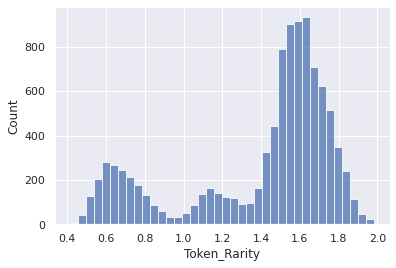

In [25]:
sns.histplot(traits_df['Token_Rarity'])

As you can see in the above, token rarity is not a linear function. It has multiple distributions.

The rarity values from 0.0-1.0 follow a normal distributions

As do the values from 1-1.3, and 1.3 to 2.0

**Shown Below:**

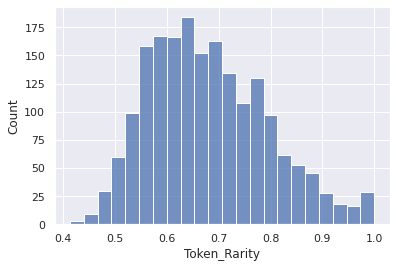

In [26]:
first_dist_df = traits_df.loc[(traits_df['Token_Rarity'] >= 0) & (traits_df['Token_Rarity'] <= 1)]
sns.histplot(first_dist_df['Token_Rarity'])

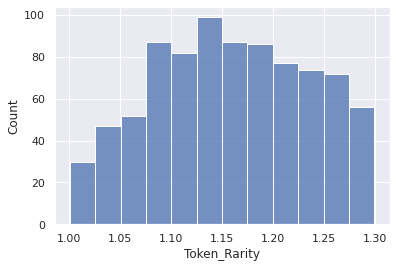

In [27]:
second_dist_df = traits_df.loc[(traits_df['Token_Rarity'] > 1) & (traits_df['Token_Rarity'] <= 1.3)]
sns.histplot(second_dist_df['Token_Rarity'])

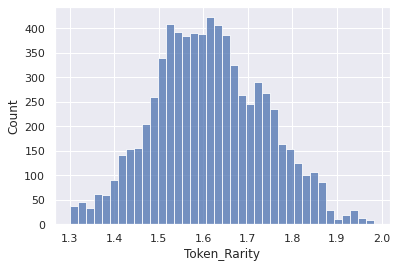

In [28]:
third_dist_df = traits_df.loc[(traits_df['Token_Rarity'] > 1.3) & (traits_df['Token_Rarity'] <= 2)]
sns.histplot(third_dist_df['Token_Rarity'])

As we are mapping token trait rarity as it relates to the sales price (and ultimately the value) of the token, this does not impact our analysis. It is however an interesting characteristic of the data set. 

In [29]:
traits_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Background_Rarity,Clothes_Rarity,Earring_Rarity,Eyes_Rarity,Fur_Rarity,Hat_Rarity,Mouth_Rarity,Trait_Count_Rarity,Token_Rarity
0,0,6,Orange,Striped Tee,Silver Hoop,X Eyes,Robot,NaN,Discomfort,0.1273,0.0412,0.0882,0.0243,0.0265,0.2256,0.0208,0.5323,1.0862
1,1,5,Orange,Vietnam Jacket,NaN,Blue Beams,Robot,NaN,Grin,0.1273,0.0224,0.7023,0.0049,0.0265,0.2256,0.0713,0.2540,1.4343
2,2,5,Aquamarine,NaN,NaN,3d,Robot,Sea Captain's Hat,Bored Cigarette,0.1266,0.1886,0.7023,0.0487,0.0265,0.0304,0.0710,0.2540,1.4481
3,3,5,Purple,Bone Necklace,NaN,Bored,Cheetah,NaN,Tongue Out,0.1291,0.0203,0.7023,0.1714,0.0406,0.2256,0.0202,0.2540,1.5635
4,4,6,Blue,Navy Striped Tee,NaN,Closed,Golden Brown,Party Hat 2,Phoneme L,0.1242,0.0334,0.7023,0.0710,0.0778,0.0107,0.0241,0.5323,1.5758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,5,Gray,Smoking Jacket,NaN,Closed,Pink,NaN,Bored,0.1170,0.0221,0.7023,0.0710,0.0511,0.2256,0.2272,0.2540,1.6703
9996,9996,6,New Punk Blue,Guayabera,Silver Hoop,3d,Dark Brown,NaN,Dumbfounded,0.1232,0.0232,0.0882,0.0487,0.1352,0.2256,0.0505,0.5323,1.2269
9997,9997,6,Purple,Sailor Shirt,NaN,Bored,Black,Halo,Grin Multicolored,0.1291,0.0284,0.7023,0.1714,0.1229,0.0324,0.0116,0.5323,1.7304
9998,9998,5,Yellow,Bayc T Red,NaN,Heart,Brown,NaN,Bored Unshaven Cigarette,0.1283,0.0140,0.7023,0.0394,0.1370,0.2256,0.0438,0.2540,1.5444


## Ranking Tokens By Rarity:

In [30]:
# Deleting Rarity Calculations:
clean_traits_df = traits_df.drop(['Background_Rarity', 'Clothes_Rarity', 'Earring_Rarity', 'Eyes_Rarity', 'Fur_Rarity', 'Hat_Rarity', 'Mouth_Rarity', 'Trait_Count_Rarity'], axis = 1)

In [31]:
clean_traits_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity
0,0,6,Orange,Striped Tee,Silver Hoop,X Eyes,Robot,NaN,Discomfort,1.0862
1,1,5,Orange,Vietnam Jacket,NaN,Blue Beams,Robot,NaN,Grin,1.4343
2,2,5,Aquamarine,NaN,NaN,3d,Robot,Sea Captain's Hat,Bored Cigarette,1.4481
3,3,5,Purple,Bone Necklace,NaN,Bored,Cheetah,NaN,Tongue Out,1.5635
4,4,6,Blue,Navy Striped Tee,NaN,Closed,Golden Brown,Party Hat 2,Phoneme L,1.5758
...,...,...,...,...,...,...,...,...,...,...
9995,9995,5,Gray,Smoking Jacket,NaN,Closed,Pink,NaN,Bored,1.6703
9996,9996,6,New Punk Blue,Guayabera,Silver Hoop,3d,Dark Brown,NaN,Dumbfounded,1.2269
9997,9997,6,Purple,Sailor Shirt,NaN,Bored,Black,Halo,Grin Multicolored,1.7304
9998,9998,5,Yellow,Bayc T Red,NaN,Heart,Brown,NaN,Bored Unshaven Cigarette,1.5444


Total Ranking from Most to Least Rare

In [32]:
clean_traits_df.sort_values('Token_Rarity')

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity
7495,7495,7,Aquamarine,Wool Turtleneck,Cross,Cyborg,Dmt,Irish Boho,Bored Dagger,0.4135
446,446,7,Gray,Cowboy Shirt,Cross,Sunglasses,Zombie,Trippy Captain's Hat,Phoneme Vuh,0.4373
8854,8854,7,Aquamarine,Bayc T Red,Cross,Eyepatch,White,Faux Hawk,Bored Party Horn,0.4392
4873,4873,7,Orange,Tie Dye,Gold Hoop,Scumbag,Solid Gold,Army Hat,Bored Pipe,0.4467
3009,3009,7,Yellow,Leather Jacket,Diamond Stud,Zombie,Zombie,Irish Boho,Grin Diamond Grill,0.4507
...,...,...,...,...,...,...,...,...,...,...
5580,5580,6,Army Green,Black Holes T,NaN,Bored,Dark Brown,Beanie,Bored,1.9710
8809,8809,6,Orange,Leather Jacket,NaN,Bored,Brown,Beanie,Bored,1.9759
3419,3419,6,New Punk Blue,Striped Tee,NaN,Bored,Brown,Seaman's Hat,Bored,1.9766
8272,8272,6,Aquamarine,Sailor Shirt,NaN,Bored,Brown,Beanie,Bored,1.9830


### **5 Rarest Tokens**

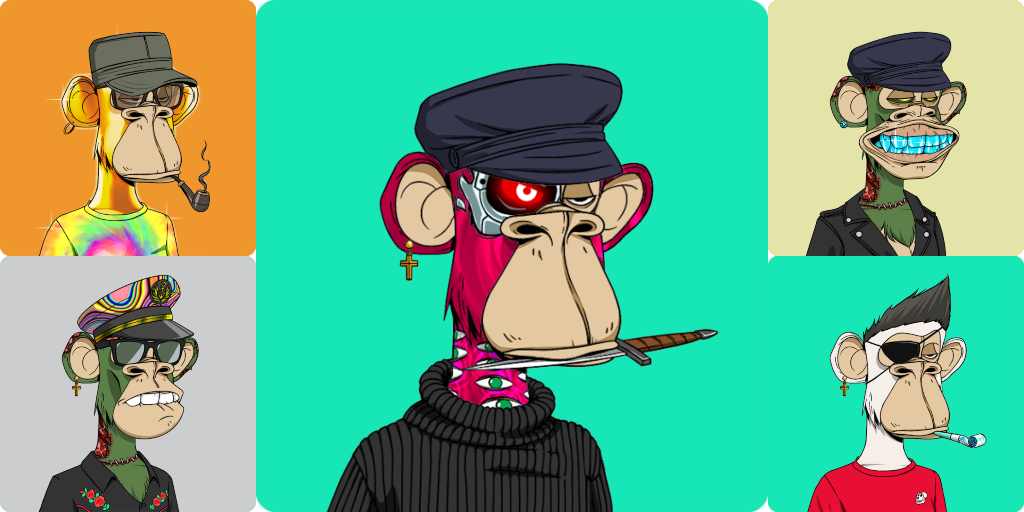

In [35]:
rarest_df = clean_traits_df.sort_values('Token_Rarity').head(5)
rarest_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity
7495,7495,7,Aquamarine,Wool Turtleneck,Cross,Cyborg,Dmt,Irish Boho,Bored Dagger,0.4135
446,446,7,Gray,Cowboy Shirt,Cross,Sunglasses,Zombie,Trippy Captain's Hat,Phoneme Vuh,0.4373
8854,8854,7,Aquamarine,Bayc T Red,Cross,Eyepatch,White,Faux Hawk,Bored Party Horn,0.4392
4873,4873,7,Orange,Tie Dye,Gold Hoop,Scumbag,Solid Gold,Army Hat,Bored Pipe,0.4467
3009,3009,7,Yellow,Leather Jacket,Diamond Stud,Zombie,Zombie,Irish Boho,Grin Diamond Grill,0.4507


### **5 Most Common Tokens**

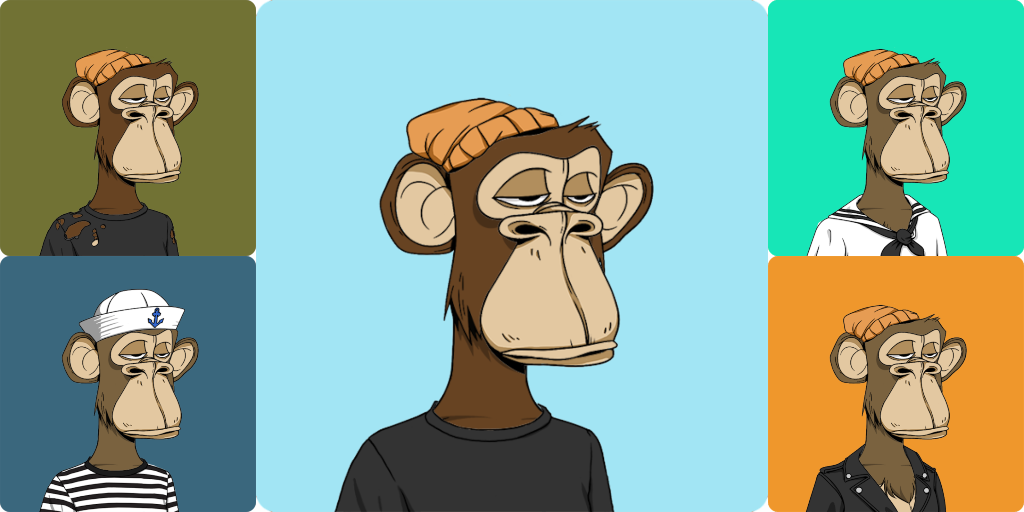

In [36]:
common_df = clean_traits_df.sort_values('Token_Rarity', ascending=False).head(5)
common_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity
8179,8179,6,Blue,Black T,NaN,Bored,Dark Brown,Beanie,Bored,1.9838
8272,8272,6,Aquamarine,Sailor Shirt,NaN,Bored,Brown,Beanie,Bored,1.9830
3419,3419,6,New Punk Blue,Striped Tee,NaN,Bored,Brown,Seaman's Hat,Bored,1.9766
8809,8809,6,Orange,Leather Jacket,NaN,Bored,Brown,Beanie,Bored,1.9759
5580,5580,6,Army Green,Black Holes T,NaN,Bored,Dark Brown,Beanie,Bored,1.9710


## Now We Add Market Data:

In [37]:
market_df

,Asset_ID,Price_USD,Token_Price,Date
0,4976,246872.70,95 (ETH),2022-02-23
1,7390,244337.56,92.88 (ETH),2022-02-23
2,1161,235445.86,89.5 (ETH),2022-02-23
3,3004,36573.04,13.668 (ETH),2022-02-23
4,1749,339582.16,125.01 (ETH),2022-02-23
...,...,...,...,...
24295,2724,410.79,0.14 (WETH),2021-05-01
24296,2978,425.46,0.145 (WETH),2021-05-01
24297,4099,701.80,0.239 (ETH),2021-05-01
24298,8349,1438.84,0.49 (ETH),2021-05-01


Market Data Statistics:

In [38]:
# Daily Trading Volumes
volume_df = market_df.value_counts('Date')

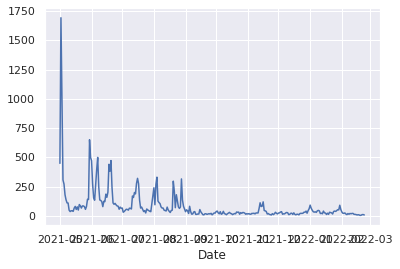

In [39]:
sns.lineplot(data=volume_df)

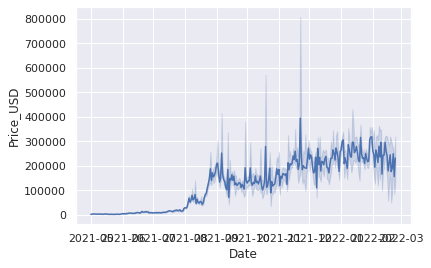

In [40]:
# Price over time
sns.lineplot(x="Date", y="Price_USD", data=market_df)

The above graphs demonstrate a decrease in trading volume over time as well as an increase in trading price over time. As the price continues to increase, the tokens are traded less. 
This trend is a possible leading indicator that the token is overvalued.

In [41]:
market_df.value_counts(normalize=True, dropna=False, ascending=True)

Asset_ID  Price_USD  Token_Price  Date      
6         19842.90   10 (ETH)     2021-06-21    0.000041
6691      6962.66    3.5 (ETH)    2021-06-21    0.000041
          3222.55    1.11 (ETH)   2021-05-02    0.000041
6690      346718.40  140 (ETH)    2022-01-28    0.000041
          214990.19  66.6 (ETH)   2021-08-28    0.000041
                                                  ...   
3759      72649.86   22.5 (ETH)   2021-08-20    0.000082
827       59037.14   18 (ETH)     2021-08-20    0.000082
9240      58647.80   18 (ETH)     2021-08-20    0.000082
5791      56204.15   17.25 (ETH)  2021-08-20    0.000082
9998      69074.08   21.2 (ETH)   2021-08-20    0.000082
Length: 24192, dtype: float64

Getting Max Sales Price of Each Token (Not All Tokens Have Trading Data)

In [42]:
top_prices_df = market_df.sort_values('Price_USD', ascending=False).drop_duplicates('Asset_ID').sort_index()

In [43]:
top_prices_df.sort_values('Price_USD')

,Asset_ID,Price_USD,Token_Price,Date
4369,8737,0.00,0 (ETH),2021-09-11
8545,7486,1.76,0.001 (ETH),2021-07-30
11050,4736,1.77,0.001 (ETH),2021-07-08
1298,3641,2.72,0.001 (ETH),2022-01-04
6452,704,4.03,0.001 (ETH),2021-08-19
...,...,...,...,...
4020,2087,2270918.52,769 (ETH),2021-09-29
4690,7090,2275949.04,600 (ETH),2021-09-02
3559,8585,2705138.81,696.969 (ETH),2021-10-19
2416,544,2815068.45,675.01 (ETH),2021-11-22


In [44]:
top_prices_df = top_prices_df.drop(['Token_Price'], axis = 1)

In [45]:
top_prices_df

,Asset_ID,Price_USD,Date
0,4976,246872.70,2022-02-23
2,1161,235445.86,2022-02-23
4,1749,339582.16,2022-02-23
5,1309,353571.30,2022-02-23
7,5149,394565.04,2022-02-23
...,...,...,...
24283,3489,936.94,2021-05-01
24289,6767,878.38,2021-05-01
24290,9031,2927.93,2021-05-01
24292,2988,731.98,2021-05-01


Add Price_USD and Date to Traits Dataframe

In [46]:
clean_traits_df.dtypes

Asset_ID          int64
Trait_Count       int64
Background       object
Clothes          object
Earring          object
Eyes             object
Fur              object
Hat              object
Mouth            object
Token_Rarity    float64
dtype: object

In [47]:
top_prices_df.dtypes

Asset_ID              int64
Price_USD           float64
Date         datetime64[ns]
dtype: object

In [48]:
full_df = clean_traits_df.merge(top_prices_df, on='Asset_ID', how='left')

Drop Rows Without Trading Data

In [49]:
full_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity,Price_USD,Date
0,0,6,Orange,Striped Tee,Silver Hoop,X Eyes,Robot,NaN,Discomfort,1.0862,NaN,NaT
1,1,5,Orange,Vietnam Jacket,NaN,Blue Beams,Robot,NaN,Grin,1.4343,NaN,NaT
2,2,5,Aquamarine,NaN,NaN,3d,Robot,Sea Captain's Hat,Bored Cigarette,1.4481,NaN,NaT
3,3,5,Purple,Bone Necklace,NaN,Bored,Cheetah,NaN,Tongue Out,1.5635,NaN,NaT
4,4,6,Blue,Navy Striped Tee,NaN,Closed,Golden Brown,Party Hat 2,Phoneme L,1.5758,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,5,Gray,Smoking Jacket,NaN,Closed,Pink,NaN,Bored,1.6703,881.32,2021-05-22
9996,9996,6,New Punk Blue,Guayabera,Silver Hoop,3d,Dark Brown,NaN,Dumbfounded,1.2269,863.50,2021-05-22
9997,9997,6,Purple,Sailor Shirt,NaN,Bored,Black,Halo,Grin Multicolored,1.7304,49598.60,2021-08-04
9998,9998,5,Yellow,Bayc T Red,NaN,Heart,Brown,NaN,Bored Unshaven Cigarette,1.5444,69074.08,2021-08-20


In [50]:
full_df = full_df[full_df['Price_USD'].notna()]

In [51]:
full_df

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity,Price_USD,Date
6,6,6,Yellow,Tweed Suit,NaN,Crazy,Cream,S&m Hat,Bored,1.7320,253448.37,2021-12-22
9,9,7,Purple,Stunt Jacket,Silver Stud,Sleepy,Brown,Seaman's Hat,Small Grin,0.6988,1838.29,2021-05-28
10,10,6,Aquamarine,Navy Striped Tee,NaN,Eyepatch,Dmt,Bayc Hat Red,Bored,1.6885,416256.37,2022-02-01
11,11,6,Gray,Smoking Jacket,NaN,Bloodshot,Dark Brown,Laurel Wreath,Bored Unshaven Cigarette,1.6445,50182.20,2021-08-03
13,13,6,Yellow,Bone Tee,NaN,Coins,Black,Police Motorcycle Helmet,Bored,1.7969,3473.26,2021-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,7,Army Green,Striped Tee,Silver Stud,Closed,Dark Brown,Vietnam Era Helmet,Bored Cigarette,0.7356,6211.15,2021-06-19
9995,9995,5,Gray,Smoking Jacket,NaN,Closed,Pink,NaN,Bored,1.6703,881.32,2021-05-22
9996,9996,6,New Punk Blue,Guayabera,Silver Hoop,3d,Dark Brown,NaN,Dumbfounded,1.2269,863.50,2021-05-22
9997,9997,6,Purple,Sailor Shirt,NaN,Bored,Black,Halo,Grin Multicolored,1.7304,49598.60,2021-08-04


## With All Market Data Available By Token, We Can Sort By Rarity and Compare Prices.

In [52]:
full_df.sort_values('Token_Rarity')

,Asset_ID,Trait_Count,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth,Token_Rarity,Price_USD,Date
8854,8854,7,Aquamarine,Bayc T Red,Cross,Eyepatch,White,Faux Hawk,Bored Party Horn,0.4392,50148.40,2021-07-31
5757,5757,7,Yellow,Hip Hop,Cross,Cyborg,Blue,Vietnam Era Helmet,Jovial,0.4560,65877.00,2021-06-22
4980,4980,7,Gray,Smoking Jacket,Gold Stud,Angry,Solid Gold,Party Hat 1,Phoneme ooo,0.4566,17503.62,2021-05-02
4889,4889,7,Blue,Hawaiian,Gold Hoop,Zombie,Trippy,Faux Hawk,Phoneme L,0.4632,5.27,2021-10-25
5754,5754,7,Blue,Bone Necklace,Gold Hoop,Scumbag,White,Girl's Hair Short,Grin Gold Grill,0.4661,4391.90,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
5580,5580,6,Army Green,Black Holes T,NaN,Bored,Dark Brown,Beanie,Bored,1.9710,675.71,2021-05-01
8809,8809,6,Orange,Leather Jacket,NaN,Bored,Brown,Beanie,Bored,1.9759,2589.98,2021-06-01
3419,3419,6,New Punk Blue,Striped Tee,NaN,Bored,Brown,Seaman's Hat,Bored,1.9766,219794.41,2021-12-25
8272,8272,6,Aquamarine,Sailor Shirt,NaN,Bored,Brown,Beanie,Bored,1.9830,4611.05,2021-06-16


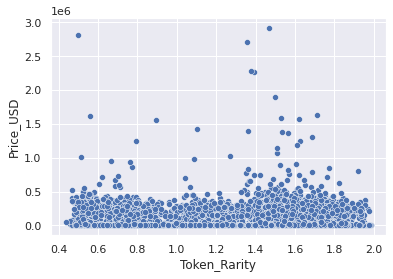

In [53]:
sns.scatterplot(x="Token_Rarity", y="Price_USD", data=full_df)

Finding correlation between the rarity metric and price:

In [54]:
stats.pearsonr(full_df['Token_Rarity'], full_df['Price_USD'])

(-0.02907640056493199, 0.00803148989131652)

# As the P-Value is less than .05 we can say with 95% certainty that we can reject the null hypothesis.

**A BAYC Tokens Price is NOT Based on the Rarity of its Combined Traits**

In [55]:
stats.ttest_ind(full_df['Token_Rarity'], full_df['Price_USD'])

Ttest_indResult(statistic=-62.25147385743747, pvalue=0.0)

# There is a difference of 62.25 standard deviations between mean price and mean rarity. The p-value is extremely small, implying that this is a real difference.Token price varies significantly compared to token rarity.

In [56]:
sample_1_n = full_df.shape[0]
sample_2_n = full_df.shape[0]
sample_1_mean = full_df['Token_Rarity'].mean()
sample_2_mean = full_df['Price_USD'].mean()
sample_1_var = full_df['Token_Rarity'].var()
sample_2_var = full_df['Price_USD'].var()

In [57]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 100184.31649372839 and 106698.048793324.


In [58]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


get_95_ci(full_df['Token_Rarity'], full_df['Price_USD'])

'The difference in means at the 95% confidence interval (two-tail) is between 100184.31649372839 and 106698.048793324.'

# **Results:** 
# **At the 95% confidence interval, the token price of a Bored Ape Yacht Club Token varies between 100,184 and 106,698** 

As a result of this analysis we are able to state with statistical certainty that a BAYC Tokens price is not correlated to its rarity. There is no statistically significant correlation between price and rarity. It is instead likely that the price of these tokens is inflated by viral trends, castle-in-the-sky like purchasing habits, a greater fool mentality, or a combination of all possibilities. The BAYC Token is quite possibly another example of a market bubble like tulip mania before it. It is recommended that anyone wishing to purchase a Bored Ape does so with caution.